# Домашнее задание № 1

<pre>
ФИО: Никифоров Владимир
</pre>

1. Масштабирование: а. Нормализовать признак - median_income б. Привести признак - population к масштабу от 0 до 100

2. Заполнение пропусков: а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

3. Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [1]:
import numpy as np
import pandas as pd

In [2]:
HOUSING_PATH = "../data/housing.csv"

In [3]:
housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1. Масштабирование

### 1а Нормализовать признак - median_income

До нормализации признак имеет следующий вид:

In [4]:
housing["median_income"].hist();

Для нормализации воспользуемся методом preprocessing из библиотеки sklearn:

In [5]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_median_income = scaler.fit_transform(housing[["median_income"]])
housing["median_income"] = pd.DataFrame(scaled_median_income)

После нормализации видим то же распределение, но уже в пределах от 0 до 1:

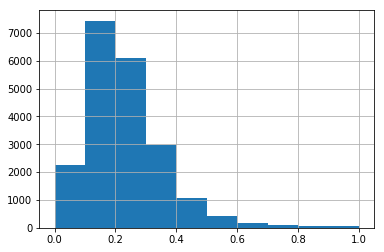

In [6]:
housing["median_income"].hist();

### 1б Привести признак - population к масштабу от 0 до 100

Аналогично посмотрим на признак population до масштабирования:

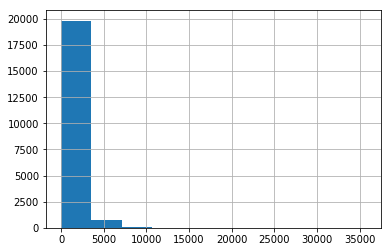

In [7]:
housing["population"].hist();

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range=[0,100])
scaled_population = scaler.fit_transform(housing[["population"]])
housing["population"] = pd.DataFrame(scaled_population)

Проверим, что после масштабирования от 0 до 100 распределение не изменилось, а масштабирование применено:

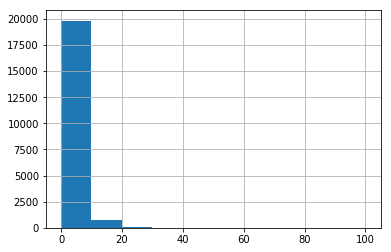

In [9]:
housing["population"].hist();

## 2. Заполнение пропусков

### 2а Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

Для начала посчитаем среднее количество спален в зависимости от значения категориальной переменной ocean_proximity:

In [10]:
mean_bedrooms_by_ocean_proximity = housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean().reset_index()

Полученный dataframe со средними имеет следующий вид:

In [11]:
mean_bedrooms_by_ocean_proximity

,ocean_proximity,total_bedrooms
0,<1H OCEAN,546.539185
1,INLAND,533.881619
2,ISLAND,420.400000
3,NEAR BAY,514.182819
4,NEAR OCEAN,538.615677


In [12]:
housing.total_bedrooms2 = housing.apply(lambda x: list(mean_bedrooms_by_ocean_proximity[mean_bedrooms_by_ocean_proximity.ocean_proximity == x.ocean_proximity]['total_bedrooms'])[0] if np.isnan(x.total_bedrooms) else x.total_bedrooms, axis=1)

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Итак, сравним. Исходные данные имели 207 пустых значений в столбце total_bedrooms:

In [13]:
housing.total_bedrooms.value_counts(dropna = False).iloc[:10]

NaN       207
 280.0     55
 331.0     51
 345.0     50
 393.0     49
 343.0     49
 394.0     48
 328.0     48
 348.0     48
 272.0     47
Name: total_bedrooms, dtype: int64

После заполнения средними значениями пустых значений нет:

In [14]:
housing.total_bedrooms2.value_counts(dropna = False).iloc[:10]

546.539185    102
280.000000     55
533.881619     55
331.000000     51
345.000000     50
393.000000     49
343.000000     49
348.000000     48
328.000000     48
394.000000     48
dtype: int64

In [15]:
housing[np.isnan(housing.total_bedrooms2)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


## 3. Категорийные атрибуты

### 3а Посчитать среднее кол-во комнат в строке (total_rooms/households)

Посчитаем непрерывную переменную "среднее количество комнат":

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

Посмотрим на ее распределение:

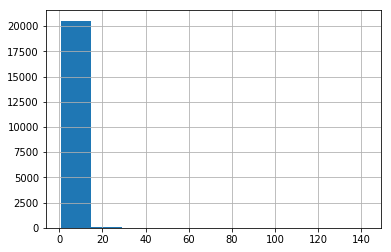

In [17]:
housing["rooms_per_household"].hist();

Заметно, что распределение сильно скошено и есть очень большие выбросы. Переведем дробные значения в целочисленные:

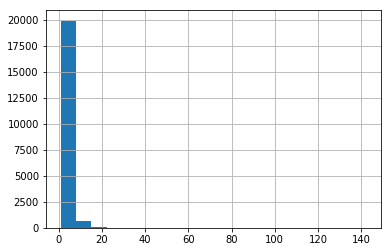

In [18]:
housing["rooms_per_household_cat"] = np.ceil(housing["rooms_per_household"])
housing["rooms_per_household_cat"].hist(bins=20);

Можно все значения более 10 обозначить за 10, отрезав таким образом длинный правый хвост:

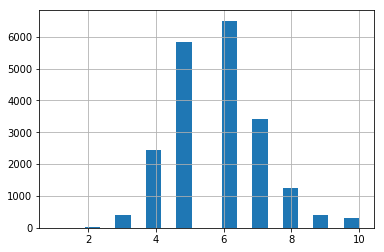

In [19]:
housing["rooms_per_household_cat"].where(housing["rooms_per_household_cat"] < 10, 10.0, inplace=True)
housing["rooms_per_household_cat"].hist(bins=20);

Полученный признак rooms_per_household_cat является категориальным.

### 3б Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

Разобъем столбец rooms_per_household_cat, к примеру, на 3 группы: <5, 5-6, >6

In [20]:
housing["rooms_per_household_cat_grp"] = housing["rooms_per_household_cat"].apply(lambda x: '<5' if x < 5 else '5-6' if x < 7 else '>6')

Полученные группы имеют следующее количество примеров в датасете:

In [21]:
housing["rooms_per_household_cat_grp"].value_counts()

5-6    12344
>6      5407
<5      2889
Name: rooms_per_household_cat_grp, dtype: int64